$ => \theta = (X^{T}X)^{-1}X^{T}y$
<br>
$ => X^{(i)}_{j} = i^{th}example, j^{th}feature$
<br>
$ => y_{pred} = h_{\theta}(X^{i}) = \sum_{i=0}^n \theta_{i}X^{i}$

- In feature matrix X a extra column of 1's is added because
- $-> h_{\theta}(X^{i}) = \theta_{0}X_{0} + \theta_{1}X_{1} + \theta_{2}X_{2}... $
- $-> \theta_{0}X_{0} = 1$
- $-> h_{\theta}(X^{i}) = \theta^{T}X $

$LOSS = \frac{1}{2}(X\theta - y)^{2}$ <= Called matrix notation form
- where $X\theta$ is y_pred and $y$ is y_actual

<br>
<br>
<br>
<br>

- Pros of Closed form solution
    - Good for small datasets
    - No need to care about learning rate 
    - Rise problem with large datasets
        - Mini batch can imporve conditions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [2]:
# GENERATE DATASET
X,y = make_regression(n_samples = 400, n_features = 1, n_informative = 1, noise = 1.8, random_state = 1)


In [5]:
X.shape,y.shape

((400, 1), (400,))

In [25]:
Y = y.reshape((-1,1))
Y.shape

(400, 1)

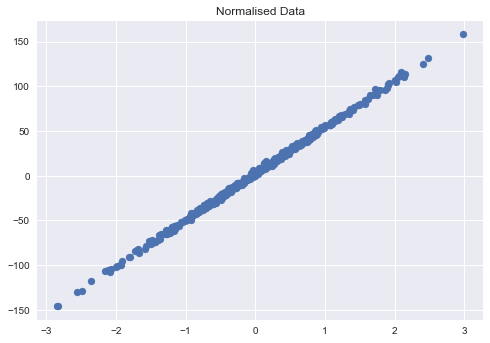

In [26]:
# NORMALIZE

X = (X - X.mean() / X.std())

# VISUALIZE

plt.figure()
plt.style.use('seaborn')
plt.scatter(X,y)
plt.title("Normalised Data")
plt.show()

In [27]:
# Inserting one extra column of ones into X matrix
ones = np.ones((X.shape[0],1))
X_ = np.hstack((X,ones))
print(X_.shape)

(400, 2)


In [28]:
X_[:5, :]

array([[-1.19505065,  1.        ],
       [-2.83324373,  1.        ],
       [-0.61301469,  1.        ],
       [ 0.55161002,  1.        ],
       [-0.28714622,  1.        ]])

In [32]:
def predict(X,theta):
    return np.dot(X,theta)

def getThetaClosedForm(X,Y):
    # using formula => \theta = (X^{T}X)^{-1}X^{T}y
    Y = np.mat(Y)
    firstPart = np.dot(X.T,X)
    secondPart = np.dot(X.T, Y)
    
    theta = np.linalg.pinv(firstPart)*secondPart
    return theta

In [33]:
theta = getThetaClosedForm(X_,Y)

In [34]:
theta

matrix([[51.89297436],
        [ 2.59296875]])

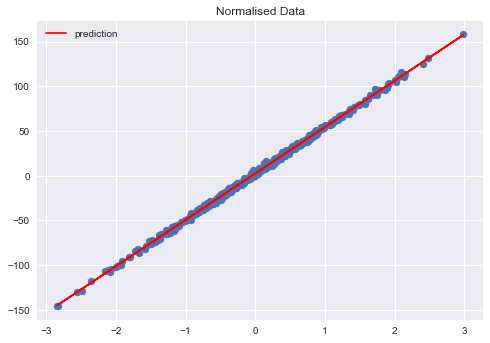

In [38]:

plt.figure()
plt.style.use('seaborn')
plt.plot(X,predict(X_,theta),color = 'red', label = 'prediction')
plt.scatter(X,y)
plt.title("Normalised Data")
plt.legend()
plt.show()